# Data Storytelling: National Parks and their Biodiversity

Explore the data set and think of a story line to present to political decision makers in the interest of native species in the US.

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print(os.getcwd())

/Users/lisahw/Documents/Courses and Conferences/DataScience/MyProject/Unit 20


## Load the data

In [2]:
df_parks = pd.read_csv('data/datasets_670_1306_parks.csv')
df_park = df_parks.set_index(df_parks['Park Name'])
df_park.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
Park Name,,,,,,
Acadia National Park,ACAD,Acadia National Park,ME,47390,44.35,-68.21
Arches National Park,ARCH,Arches National Park,UT,76519,38.68,-109.57
Badlands National Park,BADL,Badlands National Park,SD,242756,43.75,-102.50
Big Bend National Park,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
Biscayne National Park,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [3]:
df_park.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, Acadia National Park to Zion National Park
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Park Code  56 non-null     object 
 1   Park Name  56 non-null     object 
 2   State      56 non-null     object 
 3   Acres      56 non-null     int64  
 4   Latitude   56 non-null     float64
 5   Longitude  56 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.1+ KB


In [47]:
df_bio= pd.read_csv('data/species.csv')
df_bio.head()

/Users/lisahw/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [5]:
df_bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119248 entries, 0 to 119247
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Species ID           119248 non-null  object
 1   Park Name            119248 non-null  object
 2   Category             119248 non-null  object
 3   Order                117776 non-null  object
 4   Family               117736 non-null  object
 5   Scientific Name      119248 non-null  object
 6   Common Names         119248 non-null  object
 7   Record Status        119248 non-null  object
 8   Occurrence           99106 non-null   object
 9   Nativeness           94203 non-null   object
 10  Abundance            76306 non-null   object
 11  Seasonality          20157 non-null   object
 12  Conservation Status  4718 non-null    object
 13  Unnamed: 13          5 non-null       object
dtypes: object(14)
memory usage: 12.7+ MB


In [6]:
for var in df_bio.columns:
    cats = df_bio[var].unique()
    print('{} : {}'.format(var,len(cats)))
    if len(cats) <= 10:
        print(cats)

Species ID : 119248
Park Name : 56
Category : 14
Order : 555
Family : 2333
Scientific Name : 46022
Common Names : 35826
Record Status : 54
Occurrence : 8
['Present' 'Not Confirmed' 'Not Present (Historical Report)'
 'Not Present (False Report)' 'Approved' nan 'Not Present' 'In Review']
Nativeness : 6
['Native' 'Not Native' 'Unknown' nan 'Not Confirmed' 'Present']
Abundance : 9
['Rare' 'Abundant' 'Common' nan 'Uncommon' 'Occasional' 'Unknown'
 'Not Native' 'Native']
Seasonality : 25
Conservation Status : 12
Unnamed: 13 : 4
[nan 'Endangered' 'Threatened' 'Species of Concern']


This information tells us already that:

 - We are likely to have information for all 56 parks
 - Occurence needs to be combined
 - Compare Nativeness-'Native'/'Not Native' with Abundance-'Native'/'Not Native'
 - Transform categories into dummies / integers
 - identify entries with same meaning but different labels|
 - Drop categories with too many features


### All 56 parks present in both data sets?

In [28]:
[ j for i,j in zip(df_parks['Park Name'].unique(),df_bio['Park Name'].unique()) if i!=j]

[]

Yes.

### Create dummies for categories

In [7]:
df_bio.columns

Index(['Species ID', 'Park Name', 'Category', 'Order', 'Family',
       'Scientific Name', 'Common Names', 'Record Status', 'Occurrence',
       'Nativeness', 'Abundance', 'Seasonality', 'Conservation Status',
       'Unnamed: 13'],
      dtype='object')

In [48]:
df_bio.drop(['Order','Family','Scientific Name','Common Names','Unnamed: 13'],axis=1,inplace=True)

In [49]:
var = 'Record Status'
print(sum(df_bio[var].isna()))
df_bio[var].value_counts().head(10)

0


Approved            86254
In Review           32937
None                    6
 Leather Flower         1
 Skyrocket Gilia        1
 Dames Rocket           1
 Cenizo                 1
 Chico                  1
 Storksbill             1
 Common Poorwill        1
Name: Record Status, dtype: int64

In [50]:
var = 'Record Status'
for kind in df_bio[var].unique():
    if ('In Review' in kind) | ('Approved' in kind):
        df_bio[(var+'_'+kind).replace(' ','')] = 0
        df_bio[(var+'_'+kind).replace(' ','')].loc[df_bio[var]==kind] = 1
    else:
#         print(kind)
        if var.replace(' ','')+'_other' not in df_bio.columns:
            df_bio[var.replace(' ','')+'_other'] = 0
            print('other is created')
        df_bio[var.replace(' ','')+'_other'].loc[df_bio[var]==kind] = 1
df_bio.drop(var,axis=1,inplace=True)
print(df_bio.columns)


/Users/lisahw/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


other is created
Index(['Species ID', 'Park Name', 'Category', 'Occurrence', 'Nativeness',
       'Abundance', 'Seasonality', 'Conservation Status',
       'RecordStatus_Approved', 'RecordStatus_InReview', 'RecordStatus_other'],
      dtype='object')


In [51]:
var = 'Occurrence'
print(sum(df_bio[var].isna()))
df_bio['Occurrence'].value_counts()

20142


Present                            83278
Not Confirmed                      11958
Not Present (False Report)          2072
Not Present (Historical Report)     1310
Not Present                          431
Approved                              51
In Review                              6
Name: Occurrence, dtype: int64

In [52]:
var = 'Occurrence'
df_bio[var].fillna('other',inplace=True)
for kind in df_bio[var].unique():
    if 'Not Present' in kind:
        new_var = var+'_NotPresent'
        if new_var in df_bio.columns:
            df_bio[new_var].loc[df_bio[var]==kind] = 1
        else:
            df_bio[new_var] = 0
    elif ('In Review' in kind) | ('Approved' in kind) | ('other' in kind):
        if var+'_other' not in df_bio.columns:
            df_bio[var+'_other'] = 0
        df_bio[var+'_other'].loc[df_bio[var]==kind] = 1
    else:
        df_bio[var+'_'+kind.replace(' ','')] = 0
        df_bio[var+'_'+kind.replace(' ','')].loc[df_bio[var]==kind] = 1
df_bio.drop(var,axis=1,inplace=True)
print(df_bio.columns)


Index(['Species ID', 'Park Name', 'Category', 'Nativeness', 'Abundance',
       'Seasonality', 'Conservation Status', 'RecordStatus_Approved',
       'RecordStatus_InReview', 'RecordStatus_other', 'Occurrence_Present',
       'Occurrence_NotConfirmed', 'Occurrence_NotPresent', 'Occurrence_other'],
      dtype='object')


In [53]:
var = 'Nativeness'
print(sum(df_bio[var].isna()))
df_bio[var].value_counts()

25045


Native           75950
Not Native       11095
Unknown           7101
Present             53
Not Confirmed        4
Name: Nativeness, dtype: int64

In [54]:
var = 'Nativeness'
df_bio[var].fillna('other',inplace=True)
for kind in df_bio[var].unique():
    if ('Native' in kind):
        df_bio[(var+'_'+kind).replace(' ','')] = 0
        df_bio[(var+'_'+kind).replace(' ','')].loc[df_bio[var]==kind] = 1
    else:
        if var+'_other' not in df_bio.columns:
            df_bio[var+'_other'] = 0
        df_bio[var+'_other'].loc[df_bio[var]==kind] = 1
df_bio.drop(var,axis=1,inplace=True)
print(df_bio.columns)

Index(['Species ID', 'Park Name', 'Category', 'Abundance', 'Seasonality',
       'Conservation Status', 'RecordStatus_Approved', 'RecordStatus_InReview',
       'RecordStatus_other', 'Occurrence_Present', 'Occurrence_NotConfirmed',
       'Occurrence_NotPresent', 'Occurrence_other', 'Nativeness_Native',
       'Nativeness_NotNative', 'Nativeness_other'],
      dtype='object')


In [55]:
var = 'Abundance'
print(sum(df_bio[var].isna()))
df_bio[var].value_counts()

42942


Unknown       28119
Uncommon      18779
Common        12913
Rare          10768
Occasional     3312
Abundant       2365
Native           40
Not Native       10
Name: Abundance, dtype: int64

In [56]:
# categories: Rare - Uncommon - Occasional - Common - Abundant
df_bio[var].fillna('Unknown',inplace=True)
preserved_mapper = {'Rare':1 , 'Uncommon': 2, 'Occasional': 3, 'Common':4,'Abundant':5,'Unknown':0,'Native':0,'Not Native':0}
df_bio[var+'_ordinal'] = df_bio[var].replace(preserved_mapper)
df_bio.drop(var,axis=1,inplace=True)
print(df_bio[var+'_ordinal'].value_counts())

0    71111
2    18779
4    12913
1    10768
3     3312
5     2365
Name: Abundance_ordinal, dtype: int64


In [57]:
var = 'Seasonality'
print(sum(df_bio[var].isna()))
df_bio[var].value_counts()

99091


Breeder                                 12214
Resident                                 3215
Migratory                                2825
Vagrant                                  1660
Breeder, Winter                            64
Rare                                       35
Summer                                     26
Migratory, Winter                          24
Breeder, Resident                          20
Winter                                     20
Breeder, Migratory                         13
Resident, Winter                            9
Uncommon                                    5
Common                                      4
Migratory, Vagrant                          4
Migratory, Summer                           3
Unknown                                     3
Breeder, Resident, Summer                   3
Summer, Vagrant                             3
Breeder, Summer                             2
Resident, Summer                            2
Breeder, Resident, Migratory, Summ

In [58]:
df_bio[var].fillna('Unknown',inplace=True)
string = ['Resident', 'Breeder', 'Vagrant', 'Migratory', 'Summer', 'Winter']
for kind in string:
    df_bio[var+'_'+kind] = 0    
df_bio[var+'_other'] = 0
for kind_long in df_bio[var].unique():
    bool_kind = df_bio[var] == kind_long
    if kind_long in ['Rare','Uncommon','Common','Unknown']:
        df_bio[var+'_other'].loc[bool_kind] = 1
    else:
        for kind in string:
            if kind in kind_long:
                df_bio[var+'_'+kind].loc[bool_kind] += 1
df_bio.drop('Seasonality',axis=1,inplace=True)
print(df_bio.loc[:,['Seasonality_Breeder','Seasonality_Winter','Seasonality_Summer','Seasonality_Migratory','Seasonality_Resident']].sum(axis=1).unique())

[1 0 2 3 4]


In [59]:
var = 'Category'
print(sum(df_bio[var].isna()))
df_bio[var].value_counts()

0


Vascular Plant         65221
Bird                   14601
Insect                 14349
Fungi                   6203
Nonvascular Plant       4278
Fish                    3956
Mammal                  3867
Invertebrate            1566
Reptile                 1343
Algae                    976
Slug/Snail               787
Spider/Scorpion          776
Amphibian                743
Crab/Lobster/Shrimp      582
Name: Category, dtype: int64

In [60]:
var = 'Category'
df_bio[var+'_mobile'] = 0
for kind in df_bio[var].unique():
    if kind not in ['Vascular Plant','Nonvascular Plant','Algae','Fungi']:
        print(kind)
        df_bio[var+'_mobile'].loc[df_bio[var]==kind]=1
df_bio.drop(var,axis=1,inplace=True)
print(df_bio.columns)

Mammal
Bird
Reptile
Amphibian
Fish
Spider/Scorpion
Insect
Invertebrate
Crab/Lobster/Shrimp
Slug/Snail
Index(['Species ID', 'Park Name', 'Conservation Status',
       'RecordStatus_Approved', 'RecordStatus_InReview', 'RecordStatus_other',
       'Occurrence_Present', 'Occurrence_NotConfirmed',
       'Occurrence_NotPresent', 'Occurrence_other', 'Nativeness_Native',
       'Nativeness_NotNative', 'Nativeness_other', 'Abundance_ordinal',
       'Seasonality_Resident', 'Seasonality_Breeder', 'Seasonality_Vagrant',
       'Seasonality_Migratory', 'Seasonality_Summer', 'Seasonality_Winter',
       'Seasonality_other', 'Category_mobile'],
      dtype='object')


In [61]:
var = 'Conservation Status'
print(sum(df_bio[var].isna()))
df_bio[var].value_counts()

114530


Species of Concern     3843
Endangered              374
Under Review            194
Threatened              184
In Recovery              77
Proposed Endangered      24
Breeder                   7
Proposed Threatened       7
Resident                  5
Migratory                 2
Extinct                   1
Name: Conservation Status, dtype: int64

In [62]:
df_bio.drop('Conservation Status',axis=1,inplace=True)

In [63]:
df_bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119248 entries, 0 to 119247
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Species ID               119248 non-null  object
 1   Park Name                119248 non-null  object
 2   RecordStatus_Approved    119248 non-null  int64 
 3   RecordStatus_InReview    119248 non-null  int64 
 4   RecordStatus_other       119248 non-null  int64 
 5   Occurrence_Present       119248 non-null  int64 
 6   Occurrence_NotConfirmed  119248 non-null  int64 
 7   Occurrence_NotPresent    119248 non-null  int64 
 8   Occurrence_other         119248 non-null  int64 
 9   Nativeness_Native        119248 non-null  int64 
 10  Nativeness_NotNative     119248 non-null  int64 
 11  Nativeness_other         119248 non-null  int64 
 12  Abundance_ordinal        119248 non-null  int64 
 13  Seasonality_Resident     119248 non-null  int64 
 14  Seasonality_Breeder 

## Explore Dataset

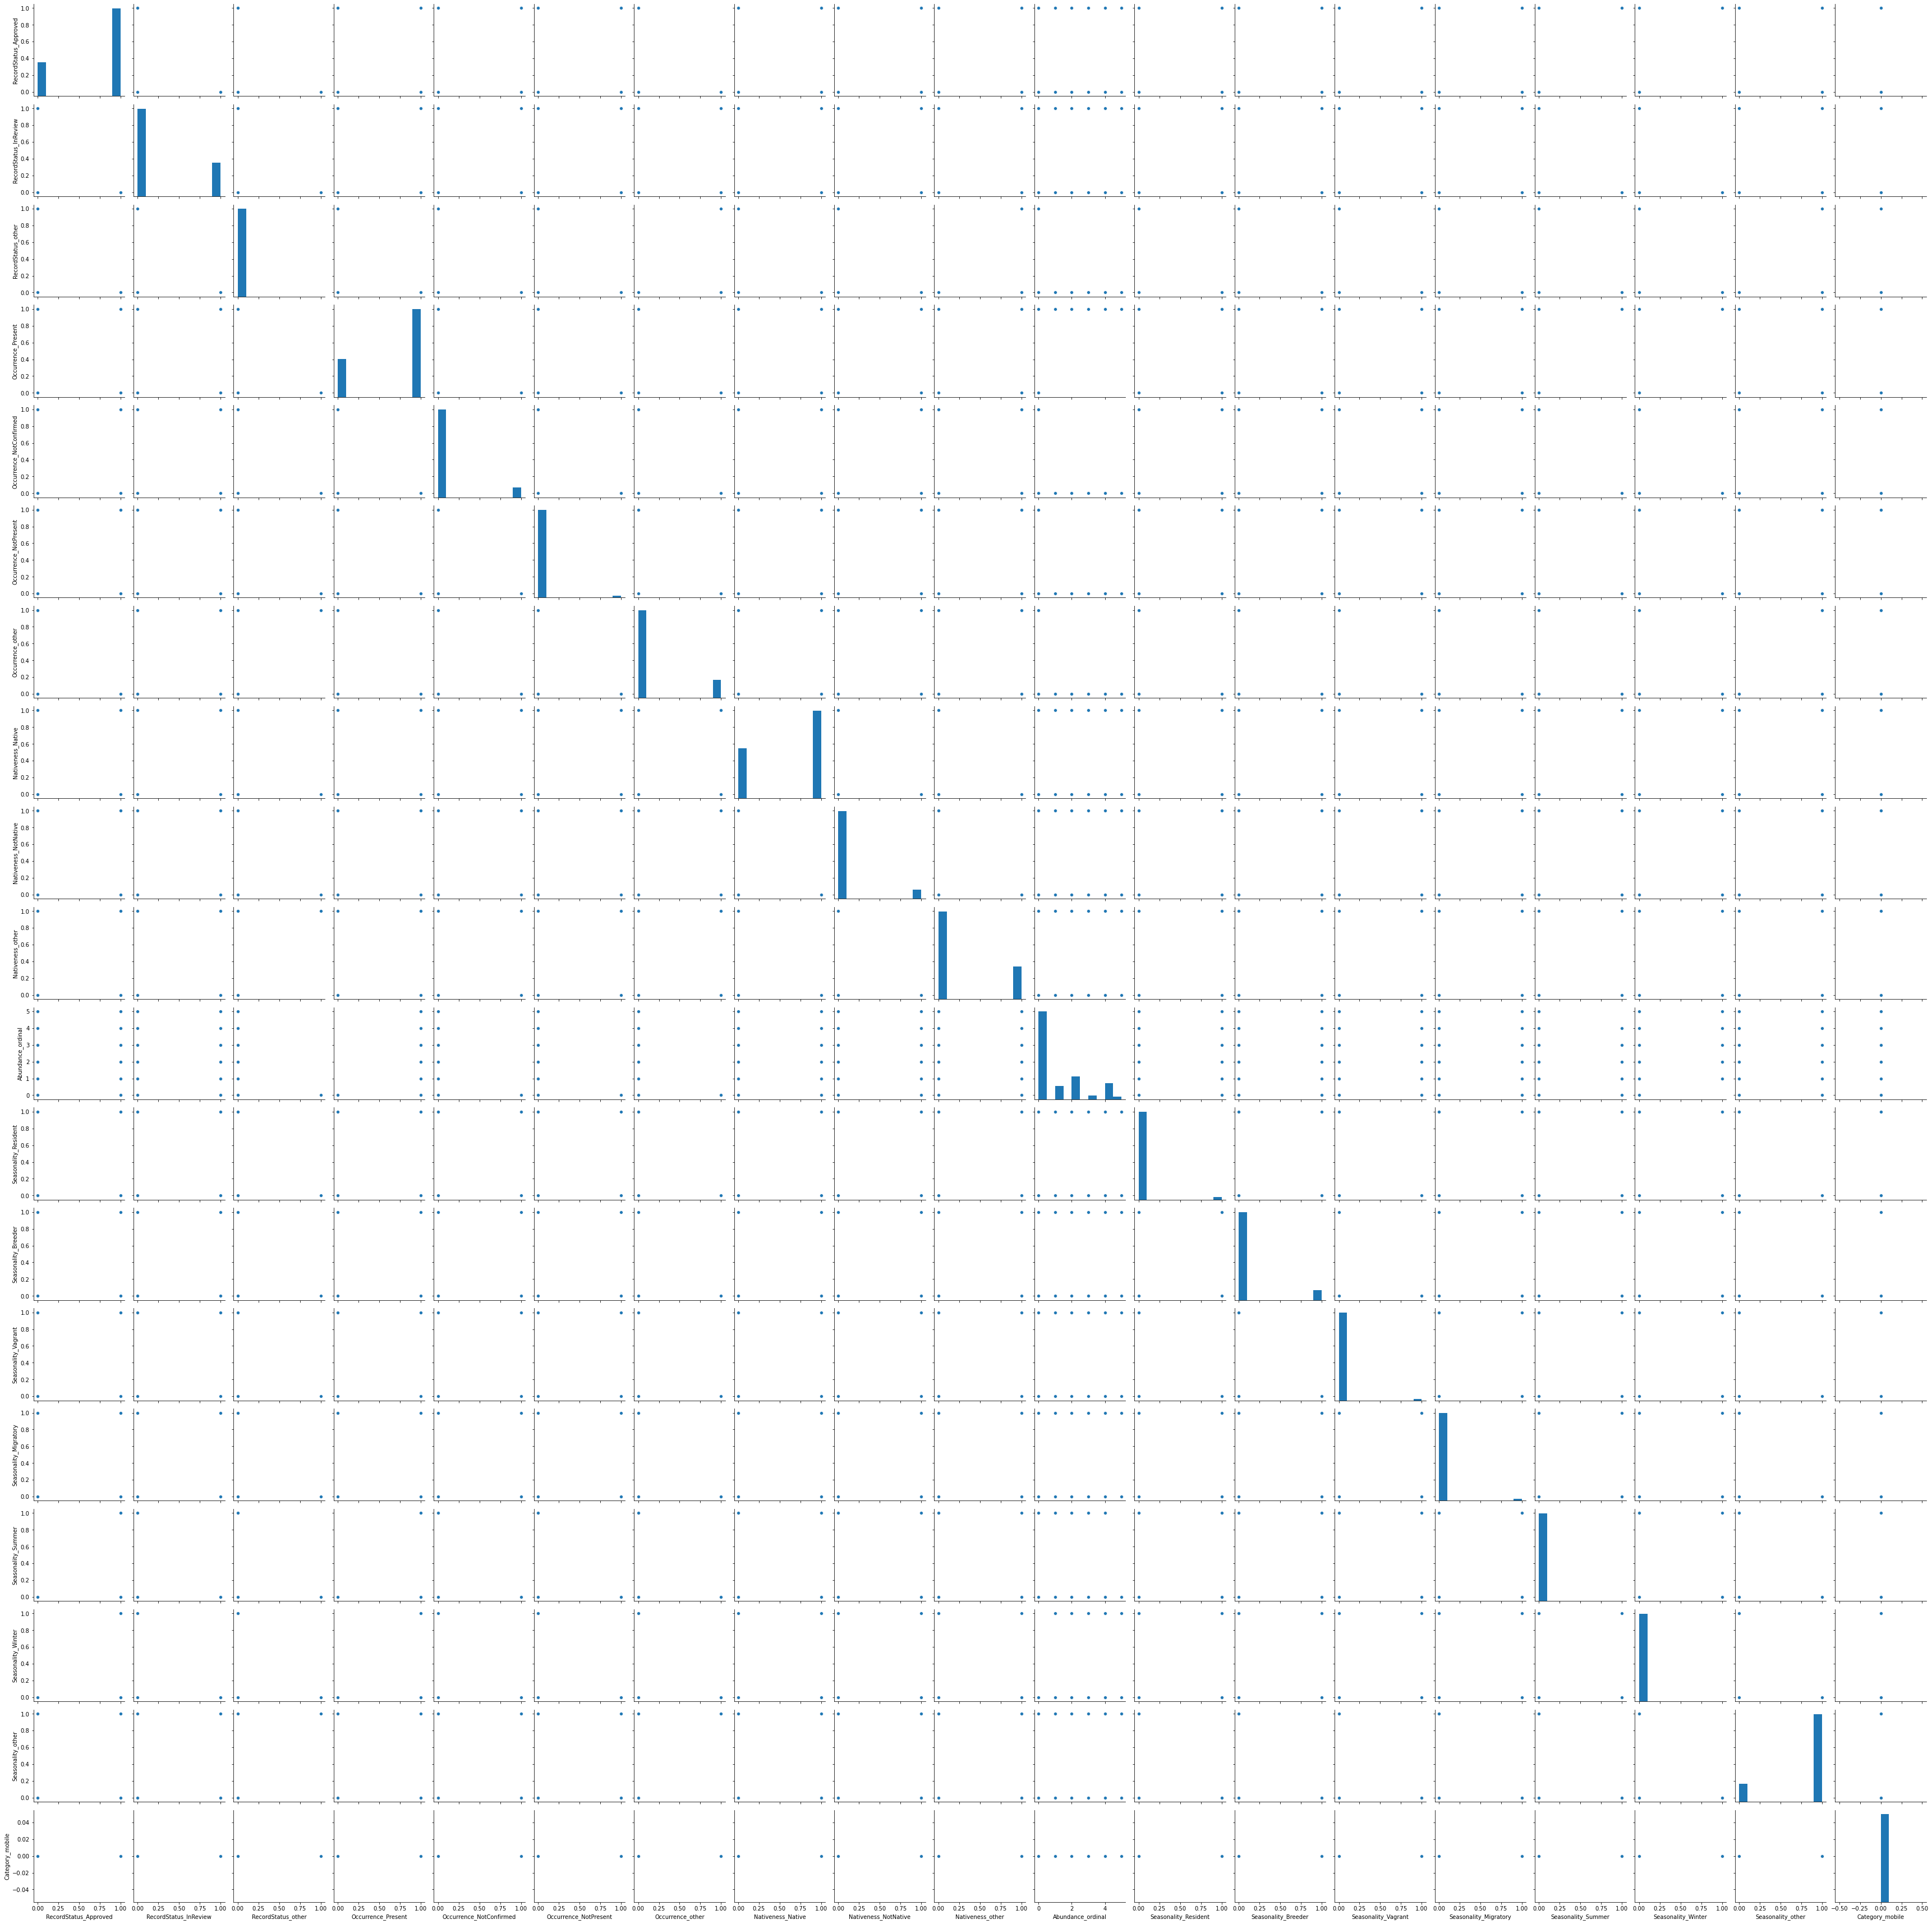

In [107]:
sns.pairplot(df_bio)

## Do chi-square test to analyze characteristics of the categories relative to one another

A high chi-square value means that the observed values are far from an expected distribution. This expected can be by default just an even division among categories. Alternatively, one can define expected values relative to their actual occurance, which is done here.

In [172]:
from scipy.stats import chisquare
cols = df_bio.columns[2:]
tot_cols = len(cols)
mat_chi = np.zeros((tot_cols,tot_cols))
mat_p = np.zeros((tot_cols,tot_cols))
for i in range(tot_cols):
    for j in range(tot_cols):
        tab = pd.crosstab(df_bio[cols[i]],df_bio[cols[j]])
        f_exp = np.array(tab.copy(),dtype=float)
        total = sum(tab.iloc[0,:])+sum(tab.iloc[1,:])
        for k in range(f_exp.shape[0]):
            for l in range(f_exp.shape[1]):
                f_exp[k][l] = (sum(tab.iloc[k,:])*sum(tab.iloc[:,l]))/total
                if f_exp[k][l] == 0.:
                    print(cols[i],cols[j],k,l)
        chi = chisquare(tab,f_exp=f_exp)
        mat_chi[i,j] = sum(chi.statistic)
        mat_p[i,j] = max(chi.pvalue)
        del chi

In [173]:
df_chi = pd.DataFrame(mat_chi,columns=cols,index=cols)
plt.figure(figsize=(12,14))
sns.heatmap(np.log10(df_chi),linewidths=.1,cmap="YlGnBu", annot=True) # df_bio.drop(['Species ID','Park Name'],axis=1).corr()
plt.yticks(rotation=0)

In [138]:
np.log10(3.841)

0.5844443071651761

All the chi-square values are above their critical value for 1 dimensions of freedom and a level of significance of 5% (3.841 with a log10 of 0.584). But the chi-squared value is taken as the sum of chi-squares for each categorical combination. For example, 10$^{3.5}$ is the sum of Approved Record Status (yes, no) and mobile Category (yes, no) and not only one hypothesis. So if the observed values of the Approved Record Status (yes, no) for mobile Category (yes) are far from what we expected, then it does not really matter anymore whether the observed values of the Approved Record Statur (yes, no) are close to the expected non-mobile Categories (no).

Therefore we also look at the maximum p-value that is obtained. And many times, these values are high either if one combination is very underrepresented or if observations are very close to the expected value. And we can see below that there are indeed categories for which the observed values can be close to the expected ones.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text major ticklabel objects>)

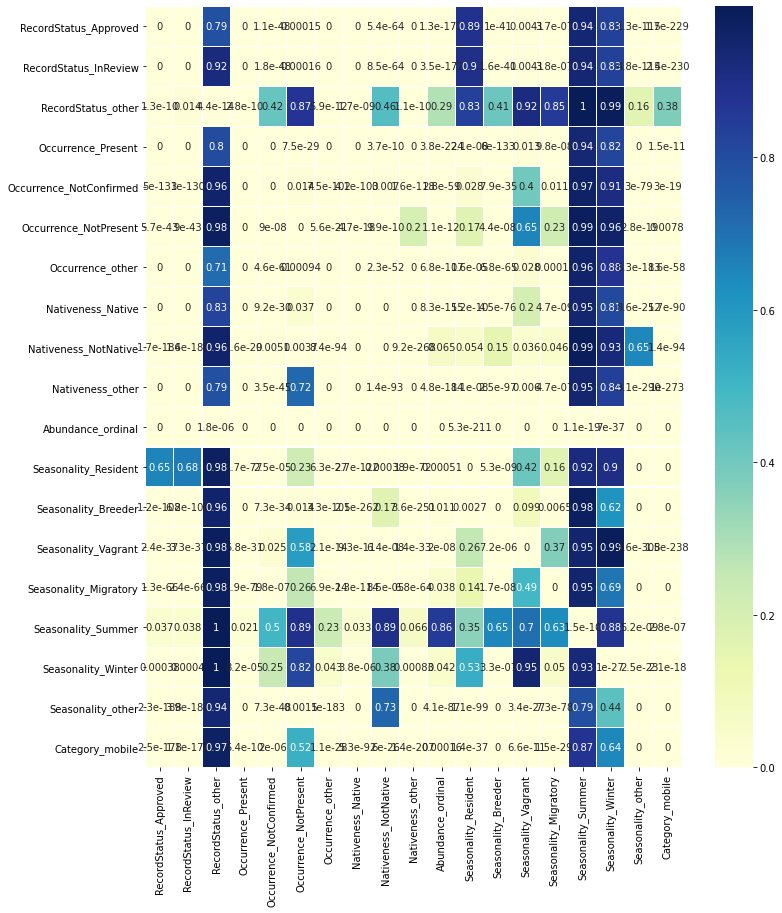

In [176]:
df_p = pd.DataFrame(mat_p,columns=cols,index=cols)
plt.figure(figsize=(12,14))
sns.heatmap(df_p,linewidths=.1,cmap="YlGnBu", annot=True) # df_bio.drop(['Species ID','Park Name'],axis=1).corr()
plt.yticks(rotation=0)

## Inspect the data per park

In [64]:
df_bio['Native_Present'] = df_bio['Nativeness_Native']*df_bio['Occurrence_Present']
df_bio['NotNative_Present'] = df_bio['Nativeness_NotNative']*df_bio['Occurrence_Present']
for var in ['Resident','Breeder','Winter','Summer','Vagrant','Migratory']:
    df_bio[var+'_Present'] = df_bio['Occurrence_Present']*df_bio['Seasonality_'+var]
for var in ['Resident','Breeder','Winter','Summer','Vagrant','Migratory']:
    df_bio[var+'_Native_Present'] = df_bio[var+'_Present']*df_bio['Nativeness_Native']
    df_bio[var+'_NotNative_Present'] = df_bio[var+'_Present']*df_bio['Nativeness_NotNative']

In [65]:
# Drop because of inter-correlation
df_bio.drop(['Nativeness_Native','Nativeness_NotNative','Occurrence_Present'],axis=1, inplace=True)
for var in df_bio.columns:
    if 'Seasonality' in var:
        df_bio.drop(var,axis=1,inplace=True)

In [29]:
df_bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119248 entries, 0 to 119247
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Species ID                   119248 non-null  object
 1   Park Name                    119248 non-null  object
 2   RecordStatus_Approved        119248 non-null  int64 
 3   RecordStatus_InReview        119248 non-null  int64 
 4   RecordStatus_other           119248 non-null  int64 
 5   Occurrence_NotConfirmed      119248 non-null  int64 
 6   Occurrence_NotPresent        119248 non-null  int64 
 7   Occurrence_other             119248 non-null  int64 
 8   Nativeness_other             119248 non-null  int64 
 9   Abundance_ordinal            119248 non-null  int64 
 10  Category_mobile              119248 non-null  int64 
 11  Resident_Present             119248 non-null  int64 
 12  Breeder_Present              119248 non-null  int64 
 13  Winter_Present

In [66]:
df_bypark = df_bio.groupby('Park Name').sum()
df_bypark.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RecordStatus_Approved,56.0,1540.250000,570.023452,663.0,1138.25,1429.5,1821.25,3298.0
RecordStatus_InReview,56.0,588.160714,999.635602,0.0,31.00,174.5,532.50,4780.0
RecordStatus_other,56.0,1.017857,5.258728,0.0,0.00,0.0,0.00,39.0
Occurrence_NotConfirmed,56.0,213.535714,154.903133,6.0,83.00,168.5,307.25,731.0
Occurrence_NotPresent,56.0,44.696429,79.418322,0.0,5.00,19.5,51.75,415.0
Occurrence_other,56.0,360.696429,799.855917,0.0,4.00,42.0,253.50,4360.0
Nativeness_other,56.0,575.053571,932.244280,0.0,38.00,214.5,534.75,4379.0
Abundance_ordinal,56.0,2173.910714,1236.666712,26.0,1466.50,1851.0,2817.50,5093.0
Category_mobile,56.0,760.178571,606.279687,190.0,367.25,566.0,931.25,3289.0
Native_Present,56.0,1151.821429,461.334472,340.0,787.75,1039.5,1456.25,2310.0


In [67]:
df_merge = pd.merge(df_bypark,df_park,left_index=True,right_index=True)

In [68]:
df_merge.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RecordStatus_Approved,56.0,1540.250000,5.700235e+02,663.00,1138.2500,1429.500,1821.25,3298.00
RecordStatus_InReview,56.0,588.160714,9.996356e+02,0.00,31.0000,174.500,532.50,4780.00
RecordStatus_other,56.0,1.017857,5.258728e+00,0.00,0.0000,0.000,0.00,39.00
Occurrence_NotConfirmed,56.0,213.535714,1.549031e+02,6.00,83.0000,168.500,307.25,731.00
Occurrence_NotPresent,56.0,44.696429,7.941832e+01,0.00,5.0000,19.500,51.75,415.00
Occurrence_other,56.0,360.696429,7.998559e+02,0.00,4.0000,42.000,253.50,4360.00
Nativeness_other,56.0,575.053571,9.322443e+02,0.00,38.0000,214.500,534.75,4379.00
Abundance_ordinal,56.0,2173.910714,1.236667e+03,26.00,1466.5000,1851.000,2817.50,5093.00
Category_mobile,56.0,760.178571,6.062797e+02,190.00,367.2500,566.000,931.25,3289.00
Native_Present,56.0,1151.821429,4.613345e+02,340.00,787.7500,1039.500,1456.25,2310.00


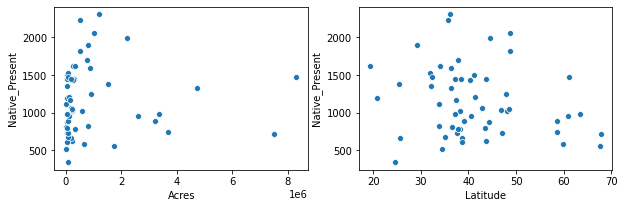

In [133]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(data=df_merge,x='Acres',y='Native_Present')
plt.subplot(1,2,2)
sns.scatterplot(data=df_merge,x='Latitude',y='Native_Present')
plt.show()

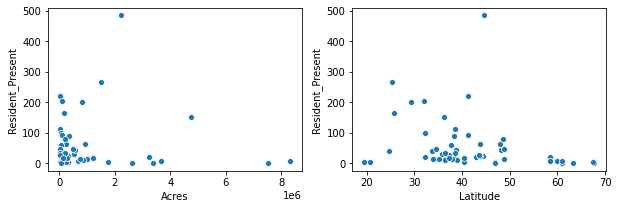

In [135]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(data=df_merge,x='Acres',y='Resident_Present')
plt.subplot(1,2,2)
sns.scatterplot(data=df_merge,x='Latitude',y='Resident_Present')
plt.show()

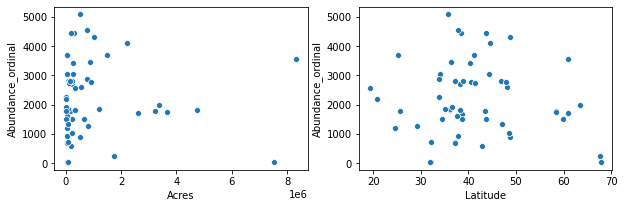

In [134]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(data=df_merge,x='Acres',y='Abundance_ordinal')
plt.subplot(1,2,2)
sns.scatterplot(data=df_merge,x='Latitude',y='Abundance_ordinal')
plt.show()

The scatter plots suggest that there could be different (at least two) clusters of data. But there is no obvious correlation between the surface area (Acres) or Latitude and the abundance of native or resident species, respectively. Before the modeling can start, the data needs to be standardized and analyzed for clusters.

## Check for outliers

In [255]:
df_merge.shape

(56, 33)

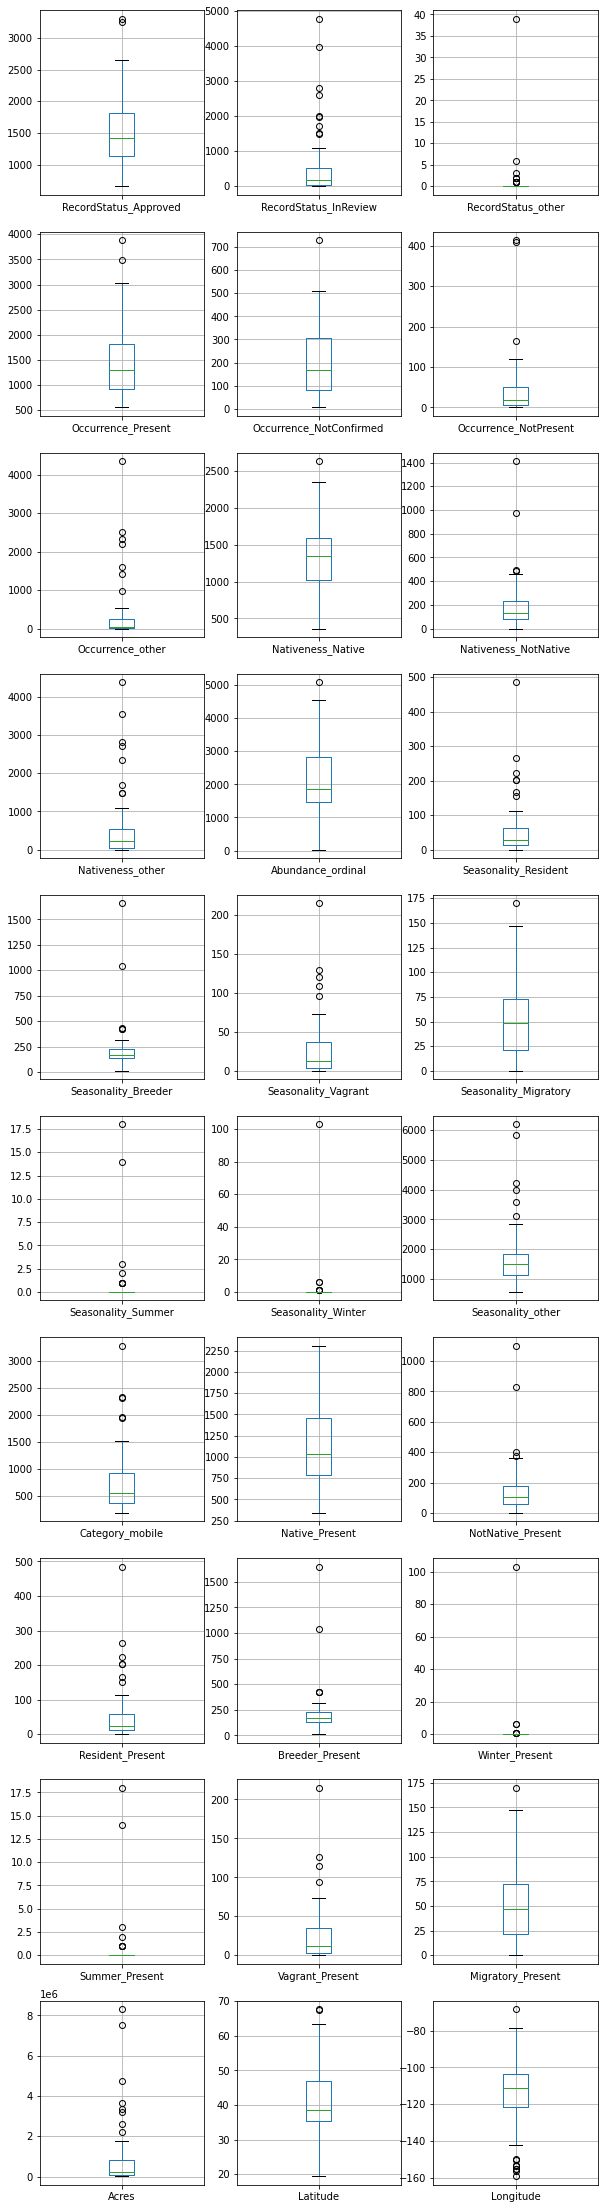

In [258]:
plt.figure(figsize=(10,40))
k = 1
for key in df_merge.columns:
    if key in ['State','Park Name','Park Code']:
        continue
    plt.subplot(10,3,k)
    df_merge.boxplot(column=key)
    k += 1

In [137]:
# Drop because of quality of data set
df_clean = df_merge.drop('RecordStatus_other',axis=1)
for var in df_merge.columns:
    if ('Winter' in var) | ('Summer' in var):
        df_clean.drop(var,axis=1,inplace=True)
        

In [138]:
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RecordStatus_Approved,56.0,1540.250000,5.700235e+02,663.00,1138.2500,1429.500,1821.25,3298.00
RecordStatus_InReview,56.0,588.160714,9.996356e+02,0.00,31.0000,174.500,532.50,4780.00
Occurrence_NotConfirmed,56.0,213.535714,1.549031e+02,6.00,83.0000,168.500,307.25,731.00
Occurrence_NotPresent,56.0,44.696429,7.941832e+01,0.00,5.0000,19.500,51.75,415.00
Occurrence_other,56.0,360.696429,7.998559e+02,0.00,4.0000,42.000,253.50,4360.00
Nativeness_other,56.0,575.053571,9.322443e+02,0.00,38.0000,214.500,534.75,4379.00
Abundance_ordinal,56.0,2173.910714,1.236667e+03,26.00,1466.5000,1851.000,2817.50,5093.00
Category_mobile,56.0,760.178571,6.062797e+02,190.00,367.2500,566.000,931.25,3289.00
Native_Present,56.0,1151.821429,4.613345e+02,340.00,787.7500,1039.500,1456.25,2310.00
NotNative_Present,56.0,155.250000,1.858199e+02,0.00,58.5000,107.500,180.00,1102.00


## Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_clean.drop(['Park Code','Park Name','State'],axis=1).values)
df_norm = scaler.transform(df_clean.drop(['Park Code','Park Name','State'],axis=1).values)
df_norm = pd.DataFrame(df_norm,columns=df_clean.drop(['Park Code','Park Name','State'],axis=1).columns,index=df_clean['Park Name'])

In [72]:
df_norm.head()

,RecordStatus_Approved,RecordStatus_InReview,Occurrence_NotConfirmed,Occurrence_NotPresent,Occurrence_other,Nativeness_other,Abundance_ordinal,Category_mobile,Native_Present,NotNative_Present,...,Resident_NotNative_Present,Breeder_Native_Present,Breeder_NotNative_Present,Vagrant_Native_Present,Vagrant_NotNative_Present,Migratory_Native_Present,Migratory_NotNative_Present,Acres,Latitude,Longitude
Park Name,,,,,,,,,,,,,,,,,,,,,
Acadia National Park,0.272167,-0.579568,1.208127,-0.339192,-0.453771,-0.584547,0.706680,-0.461317,-0.587977,0.644843,...,-0.614088,-0.269163,-0.111650,-0.557642,1.639766,-0.695907,-0.339246,-0.519821,0.288232,2.024586
Arches National Park,-0.874917,-0.591681,0.276615,-0.072376,-0.455033,-0.621349,-0.415242,-0.760896,-1.064796,-0.386906,...,0.307044,-0.662816,-0.202264,-0.475391,-0.380875,0.993883,0.537575,-0.502625,-0.236234,0.164792
Badlands National Park,-1.142215,-0.096057,-0.120743,-0.275664,-0.125771,-0.069331,-0.542529,-0.281569,-1.158847,-0.419487,...,0.000000,-0.650117,-0.236244,-0.557642,-0.306036,0.756257,-0.339246,-0.404488,0.232733,0.482702
Big Bend National Park,1.068752,-0.467523,-0.042574,-0.567891,-0.404571,-0.569394,-0.744067,-0.213332,1.640822,-0.251149,...,2.763397,-0.065987,-0.145630,0.895459,-0.380875,2.578062,-0.339246,-0.074836,-1.108495,0.448977
Biscayne National Park,0.105769,-0.467523,-0.439932,0.118207,-0.311217,0.172042,-0.330384,0.685407,-1.071358,0.118108,...,3.377485,-0.713610,-0.236244,-0.612476,1.639766,0.545033,-0.339246,-0.445713,-1.441489,1.490840


## Clustering

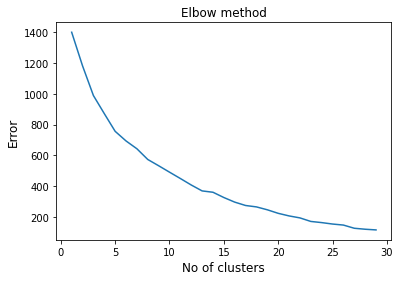

In [73]:
from sklearn.cluster import KMeans
x = df_norm.values
Error =[]
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 30), Error)
plt.title('Elbow method',fontsize=12)
plt.xlabel('No of clusters',fontsize=12)
plt.ylabel('Error',fontsize=12)
plt.show()

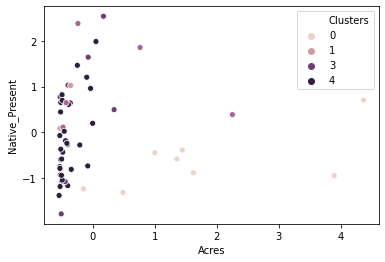

In [74]:
i = 5
x = df_norm.values
kmeans = KMeans(n_clusters = i).fit(x)
kmeans.fit(x)
df_norm['Clusters'] = kmeans.predict(x)
sns.scatterplot(x='Acres',y='Native_Present',data=df_norm,hue='Clusters')

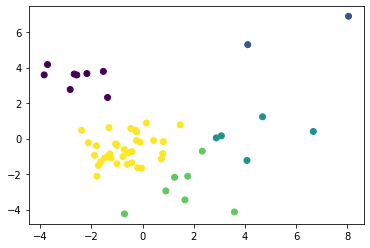

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_norm.values)
plt.scatter(pca_features[:,0],pca_features[:,1],c=df_norm.Clusters)

## Modeling

In [76]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV

### Train-Test-Split

In [77]:
pred_var = 'Native_Present'
X = df_norm.drop(pred_var,axis=1).values
y = df_norm[pred_var].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Linear Regression Model

In [140]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
print('Explained Variance: ',explained_variance_score(y_test,y_pred))
print('Mean square error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))
print('R2 score/Coeff. of determination: ',linreg.score(X_test,y_test))

Explained Variance:  0.9709911714370559
Mean square error:  0.023025065995902465
Mean absolute error:  0.13206964806701604
R2 score/Coeff. of determination:  0.9704778460266608


In [139]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polyfeat = PolynomialFeatures(degree=2,include_bias=False)
linreg = LinearRegression()
pipeline = Pipeline([("polynomial_features", polyfeat),("linear_regression", linreg)])
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
print('Explained Variance: ',explained_variance_score(y_test,y_pred))
print('Mean square error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))
print('R2 score/Coeff. of determination: ',pipeline.score(X_test,y_test))

Explained Variance:  0.5592863249384524
Mean square error:  0.3615134608775391
Mean absolute error:  0.5030747839113657
R2 score/Coeff. of determination:  0.5364766356213362


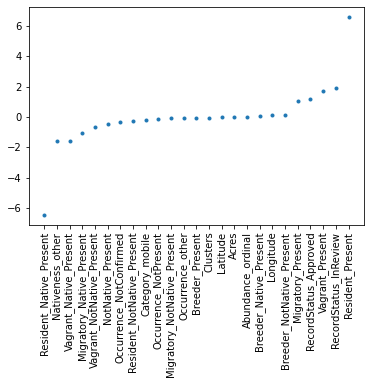

In [142]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
def argsort(seq):
    # http://stackoverflow.com/questions/3071415/efficient-method-to-calculate-the-rank-vector-of-a-list-in-python
    return sorted(range(len(seq)), key=seq.__getitem__)
ind = argsort(linreg.coef_)

plt.plot(range(len(ind)),linreg.coef_[ind],'.')
plt.xticks(range(len(ind)),labels=df_norm.drop(pred_var,axis=1).columns[ind],rotation=90)
plt.show()

## Decision Tree Regressor

In [94]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=7,max_features=9, random_state=42)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

print('Mean square error: ',mean_squared_error(y_test,y_pred))
print('R2 score/Coeff. of determination: ',r2_score(y_test,y_pred))

Mean square error:  0.2932855936363814
R2 score/Coeff. of determination:  0.6239566716101348


In [82]:
param_grid = {"ccp_alpha": [0.0,0.5],
 "max_depth": [2,3, None],
 "max_features": [3, 6, 9],
 "min_samples_split": [2, 5],
 "min_samples_leaf": [1, 3]}
reg3 = DecisionTreeRegressor(random_state=42)
grid = GridSearchCV(estimator=reg3, param_grid=param_grid, n_jobs=-1,cv=2)
grid.fit(X_train, y_train)
print('Best score: ',grid.best_score_)
print('Best set of parameters: ' ,grid.best_params_)
y_pred = grid.predict(X_test)
print('Mean square error: ',mean_squared_error(y_test,y_pred))
print('R2 score/Coeff. of determination: ',r2_score(y_test,y_pred))

Best score:  0.5051037125924072
Best set of parameters:  {'ccp_alpha': 0.0, 'max_depth': 2, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean square error:  0.4567214085195344
R2 score/Coeff. of determination:  0.4144034267856782


In [144]:
print('Feature Importance:')
ind = argsort(tree_reg.feature_importances_)
for i in ind:
    print('{} : {:.1f}%'.format(df_norm.drop(pred_var,axis=1).columns[i],100*tree_reg.feature_importances_[i]))

Feature Importance:
RecordStatus_InReview : 0.0%
Occurrence_NotPresent : 0.0%
NotNative_Present : 0.0%
Migratory_Present : 0.0%
Resident_NotNative_Present : 0.0%
Vagrant_NotNative_Present : 0.0%
Migratory_NotNative_Present : 0.0%
Acres : 0.0%
Clusters : 0.0%
Nativeness_other : 0.0%
Category_mobile : 0.0%
Occurrence_other : 0.1%
Vagrant_Present : 0.2%
Longitude : 0.6%
Resident_Present : 1.1%
Breeder_Native_Present : 1.2%
Breeder_NotNative_Present : 1.4%
Occurrence_NotConfirmed : 1.7%
Latitude : 2.1%
Resident_Native_Present : 3.1%
Migratory_Native_Present : 3.7%
Vagrant_Native_Present : 6.5%
Breeder_Present : 12.0%
RecordStatus_Approved : 30.8%
Abundance_ordinal : 35.5%


## Random Forest Regressor

In [105]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=0, min_samples_leaf= 2,max_depth=7,n_estimators=150)
# regressor = RandomForestRegressor(bootstrap= False,max_depth= 3, max_features= 6, min_samples_leaf= 3, min_samples_split=2,n_estimators= 250)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean square error: ',mean_squared_error(y_test,y_pred))
print('R2 score/Coeff. of determination: ',r2_score(y_test,y_pred))

Mean square error:  0.3579992840007134
R2 score/Coeff. of determination:  0.5409824238290947


In [145]:
param_grid = {"n_estimators": [150,250],
 "max_depth": [3, None],
 "max_features": [3, 6, 9],
 "min_samples_split": [2, 5],
 "min_samples_leaf": [1, 3],
 "bootstrap": [True, False]}
reg2 = RandomForestRegressor(random_state=0)
grid = GridSearchCV(estimator=reg2, param_grid=param_grid, n_jobs=-1,cv=2)
grid.fit(X_train, y_train)
print('Best score: ',grid.best_score_)
print('Best set of parameters: ' ,grid.best_params_)
y_pred = grid.predict(X_test)
print('Mean square error: ',mean_squared_error(y_test,y_pred))
print('R2 score/Coeff. of determination: ',r2_score(y_test,y_pred))

Best score:  0.6450412432479777
Best set of parameters:  {'bootstrap': False, 'max_depth': 3, 'max_features': 9, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 250}
Mean square error:  0.4916628520888596
R2 score/Coeff. of determination:  0.36960239658285754


In [147]:
print('Feature Importance:')
ind = argsort(regressor.feature_importances_)
for i in ind:
    print('{} : {:.1f}%'.format(df_norm.drop(pred_var,axis=1).columns[i],100*regressor.feature_importances_[i]))

Feature Importance:
Clusters : 0.0%
Vagrant_NotNative_Present : 0.1%
Migratory_Native_Present : 0.4%
Migratory_Present : 0.4%
Occurrence_other : 0.4%
Breeder_NotNative_Present : 0.4%
Resident_Native_Present : 0.4%
NotNative_Present : 0.5%
Nativeness_other : 0.6%
Resident_NotNative_Present : 0.6%
Resident_Present : 0.6%
Longitude : 0.8%
RecordStatus_InReview : 0.8%
Latitude : 0.8%
Migratory_NotNative_Present : 1.3%
Occurrence_NotPresent : 1.6%
Category_mobile : 1.8%
Abundance_ordinal : 1.8%
Vagrant_Present : 1.9%
Acres : 2.0%
Occurrence_NotConfirmed : 3.5%
Vagrant_Native_Present : 4.0%
Breeder_Present : 19.8%
RecordStatus_Approved : 22.3%
Breeder_Native_Present : 33.3%


## Gradient Boosting Regressor

In [123]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42,min_samples_leaf=1,max_depth=3,max_features=6,subsample=0.5,n_estimators=150)
# Fit the model on the trainng data.
gbr.fit(X_train, y_train)
# Print the accuracy from the testing data.
y_pred = gbr.predict(X_test)
print('Explained Variance: ',explained_variance_score(y_test,y_pred))
print('Mean square error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))
print('R2 score/Coeff. of determination: ',r2_score(y_test,y_pred))

Explained Variance:  0.6298359369592595
Mean square error:  0.30215583193318124
Mean absolute error:  0.41994801191045533
R2 score/Coeff. of determination:  0.6125834776820507


In [116]:
param_grid = {"n_estimators": [100,150,250],
              "subsample": [0.5,0.75,1],
 "max_depth": [3, None],
 "max_features": [3, 6, 9],
 "min_samples_split": [2, 5],
 "min_samples_leaf": [1, 3]}
gbr = GradientBoostingRegressor(random_state=42)
grid = GridSearchCV(estimator=gbr, param_grid=param_grid, n_jobs=-1,cv=2)
grid.fit(X_train, y_train)
print('Best score: ',grid.best_score_)
print('Best set of parameters: ' ,grid.best_params_)
y_pred = grid.predict(X_test)
print('Mean square error: ',mean_squared_error(y_test,y_pred))
print('R2 score/Coeff. of determination: ',r2_score(y_test,y_pred))

Best score:  0.7219509055486734
Best set of parameters:  {'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150, 'subsample': 0.5}
Mean square error:  0.30215583193318124
R2 score/Coeff. of determination:  0.6125834776820507


In [124]:
print('Feature Importance:')
ind = argsort(gbr.feature_importances_)
for i in ind:
    print('{} : {:.1f}%'.format(df_norm.drop(pred_var,axis=1).columns[i],100*gbr.feature_importances_[i]))

Feature Importance:
Migratory_NotNative_Present : 0.1%
Clusters : 0.1%
Nativeness_other : 0.6%
Vagrant_NotNative_Present : 0.8%
RecordStatus_InReview : 0.9%
Occurrence_other : 1.0%
Migratory_Native_Present : 1.1%
Longitude : 1.2%
Resident_Present : 1.2%
Latitude : 1.5%
Migratory_Present : 1.7%
Abundance_ordinal : 1.8%
Occurrence_NotPresent : 2.0%
Resident_Native_Present : 2.3%
Resident_NotNative_Present : 2.7%
NotNative_Present : 3.4%
Category_mobile : 3.5%
Breeder_NotNative_Present : 3.9%
Acres : 4.1%
Vagrant_Native_Present : 5.5%
Occurrence_NotConfirmed : 6.0%
Vagrant_Present : 6.1%
Breeder_Native_Present : 8.9%
RecordStatus_Approved : 19.5%
Breeder_Present : 20.0%


# Conclusions

There are no obvious relationships that could explain the number of native species in a National Park. The different models reveal different importance for individual features:

**The linear regression model** reveals that the more resident animals are present, the more natives are present. Interestingly, the native resident species are negatively correlated to the abundance of native species.

**The decision tree regressor** identifies that the general abundance of animals is the highest indicator for native species. The approved record status could be an indicator for the intensity and sincerity with which animals are monitored.

**The random forest regressor** is the least performing model (according to R$^2$). Similar to the DTR, the approved record status appears second on the importance rank. Breeders seem to play an important role according to the RFR.

**The gradient boosting model** outperforms the RFR but shows the same hierachy for the most important features.

# Potential Questions

- What drives the abundance of native species in a National Park?
- Is the size or location of the park relevant?
- Are there groups of animals that are more relevant than others?
- Can we identify subgroups of parks with common features? Do these features play a role for the abundance of native species?
- Is the population size (in respect to all species) a relevant indicator for the number of native species in a park?

## Storyline

1) Present a species native to the US that is at the edge of being extinct. E.g. https://www.animalwised.com/most-endangered-species-in-north-america-1543.html

2) What can we do to protect them?

3) Introduce the facts about national parks in the US (#, average size, distribution, map??).

4) One would think that the size of the park is a clear indicator for the abundance of native species. (present scatter plots, low correlation)

5) Obviously, there must be more than just space. (explain the different approaches: clustering, correlation to other species (types), indicators for quality of biological livelihood in the park, management indicators, ...)

6) Finish with the open question of: so what is actually driving the a